# **Uji Hipotesis Dataset Energy Consumption**

### **Penggunaan Dataset Energy Consumption**

> Dataset dirancang untuk memprediksi konsumsi energi berdasarkan berbagai fitur bangunan dan faktor lingkungan. Dataset ini berisi data untuk berbagai jenis bangunan, luas bangunan, jumlah penghuni, peralatan yang digunakan, suhu rata-rata, dan hari dalam seminggu. Tujuannya adalah untuk membangun model prediktif untuk memperkirakan konsumsi energi dengan menggunakan atribut-atribut ini.

> Dataset ini dapat digunakan untuk melatih model pembelajaran mesin seperti regresi linier untuk memperkirakan kebutuhan energi berdasarkan karakteristik bangunan. Hal ini berguna untuk memahami pola permintaan energi dan mengoptimalkan konsumsi energi di berbagai jenis bangunan dan kondisi lingkungan.

In [ ]:
# Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import kstest

In [ ]:
!kaggle datasets download -d govindaramsriram/energy-consumption-dataset-linear-regression

Dataset URL: https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/16.3k [00:00<?, ?B/s]
100% 16.3k/16.3k [00:00<00:00, 18.3MB/s]


In [ ]:
!unzip energy-consumption-dataset-linear-regression.zip

Archive:  energy-consumption-dataset-linear-regression.zip
  inflating: test_energy_data.csv    
  inflating: train_energy_data.csv   


In [ ]:
data = "train_energy_data.csv"
df = pd.read_csv(data, sep=',', encoding='latin-1', low_memory=False)
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


### **Penjelasan Fitur dalam Dataset**

**1). Building Type → Jenis bangunan**

=> Variabel kategorikal mewakili jenis bangunan yang harus dikonversi ke numerik sebelum digunakan dalam model regresi. (residential biasanya konsumsi energi lebih rendah dibandingkan bangunan komersial).

**2). Square Footage → Luas bangunan dalam satuan kaki persegi.**

=> Variabel numerik mewakili total luas bangunan yang berpengaruh terhadap konsumsi energi (semakin besar luasnya, mungkin semakin tinggi konsumsi energinya karena biasanya terdapat banyak barang elektronik).

**3). Number of Occupants → Jumlah penghuni atau pengguna bangunan.**

=> Variabel yang berpengaruh terhadap konsumsi energi (semakin banyak orang, semakin banyak listrik yang digunakan).

**4). Appliances Used → Jumlah peralatan listrik yang digunakan dalam bangunan.**

=> Variabel yang juga bisa sangat memengaruhi konsumsi energi. (semakin banyak peralatan, semakin banyak listrik yang digunakan).

**5). Average Temperature → Suhu rata-rata dalam bangunan.**

=> Variabel yang bisa berpengaruh pada penggunaan AC atau pemanas. (semakin panas, semakin banyak listrik yang digunakan untuk AC, Kipas, dll).

**6). Day of Week → Hari dalam seminggu (Weekday atau Weekend).**

=> Variabel faktor penting karena konsumsi energi di hari kerja dan akhir pekan mungkin berbeda (misalnya kantor lebih aktif di weekdays).

**7). Energy Consumption →** Variabel target numerik yang mewakili konsumsi energi bangunan dalam kWh (kilowatt-jam).

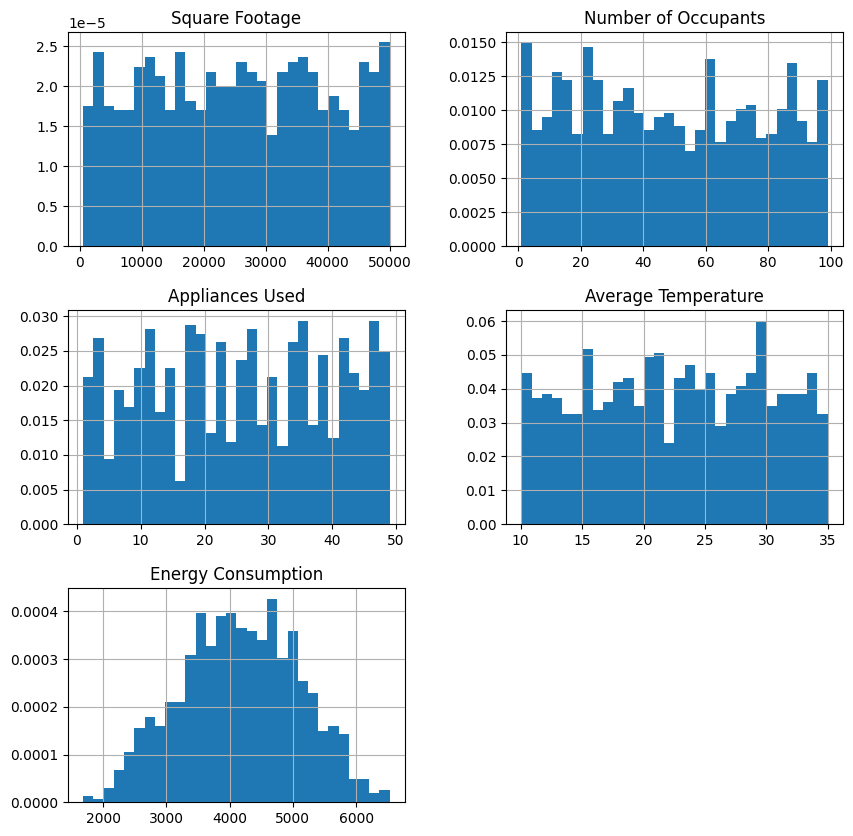

In [ ]:
df.hist(bins=30, figsize=(10,10), density=True)
plt.show()

### **Membaca Histogram (Density Normalization)**
> Sumbu Y menunjukkan kepadatan probabilitas, bukan jumlah absolut.

> Nilai pada sumbu Y lebih kecil karena menunjukkan proporsi relatif dari total data dalam setiap bin.

> Puncak histogram berarti rentang luas bangunan tersebut lebih umum dibandingkan rentang lainnya.


---
### **Interpretasi Histogram**
1). **Square Footage (Multimodal)**: Distribusi cukup tersebar dengan banyak variasi ukuran rumah.
Dengan puncak kecil di sekitar 0-5000 sqft dan distribusi yang relatif merata setelahnya.

2). **Number of Occupants (Multimodal)**: Jumlah penghuni bervariasi, tidak ada pola yang jelas. Ada beberapa titik di mana jumlah penghuni lebih sering muncul dibanding lainnya.

3). **Appliances Used (Bimodal)**: Distribusi tidak merata, ada banyak fluktuasi. Rumah dengan jumlah alat elektronik tertentu lebih umum daripada jumlah lainnya.

4). **Average Temperature (Uniform)**: Cenderung terdistribusi merata antara 10°C hingga 35°C. Tidak ada puncak dominan, yang menunjukkan bahwa suhu rata-rata rumah dalam dataset cukup bervariasi.

5). **Energy Consumption (Skew Right)**: Sebagian besar rumah mengonsumsi energi di sekitar 3500 - 5000, tapi ada beberapa yang memiliki konsumsi energi lebih tinggi.

In [ ]:
# Mengecek Normalitas Data

ks_length = kstest(df['Energy Consumption'], 'norm')
print(ks_length)

if ks_length.pvalue > 0.05:
    print("Data berdistribusi normal")
else:
    print("Data tidak berdistribusi normal")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1683.95, statistic_sign=-1)
Data tidak berdistribusi normal


**Interpretasi Output**
> **KstestResult:**
* **Statistic = 1.0** → Nilai maksimum selisih antara distribusi data dan distribusi normal.
* **Pvalue = 0.0** → Sangat kecil (< 0.05), sehingga menolak H₀ (data tidak berdistribusi normal).
* **Statistic_location = 1683.95** → Nilai data tempat selisih maksimum terjadi.
* **Statistic_sign = -1** → Menunjukkan arah selisih distribusi terhadap distribusi normal

> Karena **p-value = 0.0 < 0.05**, hasilnya:
"Data **tidak** berdistribusi normal"

In [ ]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


**Interpretasi Output**
> **Statistik untuk setiap kolom:**
* **count** =	Jumlah data dalam kolom (1000 data untuk semua kolom).
* **mean** =	Nilai rata-rata dari kolom.
* **std** =	Standar deviasi (menunjukkan sebaran data).
* **min** =	Nilai terkecil dalam kolom.
* **25%** =	Kuartil pertama (nilai tengah antara min dan median).
* **50%** =	Median (titik tengah data).
* **75%** =	Kuartil ketiga (nilai tengah antara median dan max).
* **max** =	Nilai terbesar dalam kolom.


---
**Contoh Dari Data:**
* Energy Consumption memiliki nilai rata-rata **4166.25**, dengan min **1683.95** dan max **6530.60**.
* Square Footage berkisar antara **560** hingga **49,997**, dengan standar deviasi **14,294.55**, menunjukkan variasi yang besar.
* Number of Occupants rata-rata **48.37**, dengan minimum **1** dan maksimum **99**, menunjukkan distribusi jumlah penghuni yang cukup luas.

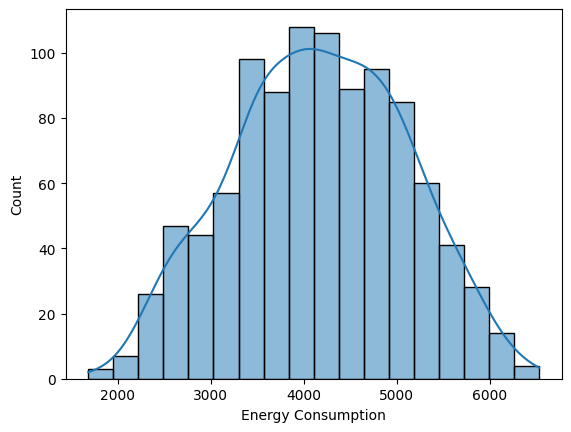

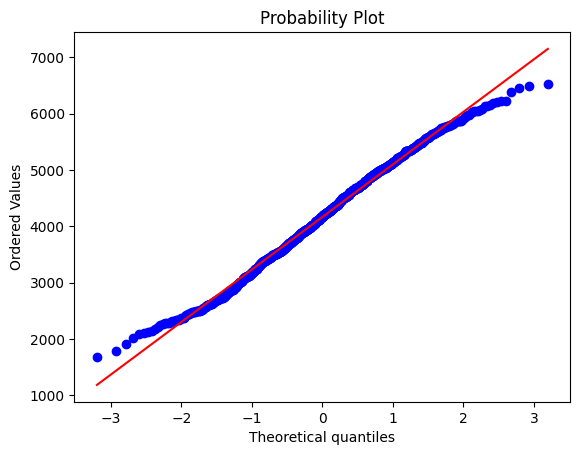

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram Data 'Energy Consumption'
sns.histplot(df["Energy Consumption"], kde=True)
plt.show()

# Probability Plot 'Energy Consumption'
stats.probplot(df["Energy Consumption"], dist="norm", plot=plt)
plt.show()

**Interpretasi Visualisasi Output**

> **Penjelasan Histogram:**
* Histogram menunjukkan distribusi Energy Consumption dengan bentuk mendekati distribusi normal.
* Kurva KDE (garis biru) membentuk pola simetris di sekitar nilai tengah.
* Tidak ada skewness yang signifikan, tetapi cenderung miring ke kanan (**Skew Left**). Namun, sebaran data cukup merata, tanpa outlier ekstrem yang mencolok.

> **Penjelasan Probability Plot:**
* Titik-titik **hampir sejajar** dengan garis merah diagonal, menunjukkan bahwa distribusi Energy Consumption mendekati distribusi normal.
* Sedikit penyimpangan di bagian ujung kiri dan kanan → kemungkinan ada sedikit **skewness** atau outlier di ekor distribusi.
* Secara keseluruhan, **data cukup normal**.

# **Uji Hipotesis Deskriptif [ Wilcoxon Test ]**

In [ ]:
#Hipotesis Deskriptif
#H0 : Energy Consumption Sama Dengan 1,0
#H1 : Energy Consumption Tidak Sama Dengan 1,0

import scipy.stats as stats
stat, p_value = stats.wilcoxon(df['Energy Consumption'] - 0.5)

print(f"Wilcoxon Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05 # alpha = 0.05 → Tingkat signifikansi 5%.

if p_value < alpha:
    print("Tolak H0: Energy Consumption tidak sama dengan 0.5.")
else:
    print("Gagal tolak H0: Energy Consumption sama dengan 0.5.")

Wilcoxon Statistic: 0.0000
P-value: 0.0000
Tolak H0: Energy Consumption tidak sama dengan 0.5.


**Interpretasi Output**
> **Wilcoxon Test:**
* Wilcoxon Statistic = 0.0000 → Semua perbedaan memiliki arah yang sama (positif atau negatif).
* P-value = 0.0000 → Sangat kecil (< 0.05), menunjukkan hasil signifikan secara statistik.
* Keputusan → Tolak H0, sehingga Energy Consumption ≠ 1.0 secara signifikan.

# **Uji Hipotesis Komparatif [ Mann Whitney Test ]**

In [ ]:
#Hipotesis Komparatif
#H0 : Energy Consumption dan Average Temperature Sama
#H1 : Energy Consumption dan Average Temperature Tidak Sama

In [ ]:
combined_data = np.concatenate([df['Average Temperature'], df['Energy Consumption']])

# Melakukan Uji KS pada Data Gabungan
ks_result = kstest(combined_data, 'norm')

print(ks_result)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=10.05, statistic_sign=-1)


**Interpretasi Output**
> **KstestResult:**
* **Statistic = 1.0** → Maksimum selisih antara distribusi data dan distribusi normal mencapai 1.0 (artinya sangat berbeda).
* **Pvalue = 0.0** → Nilai p sangat kecil (< 0.05), sehingga kita menolak H0 (data tidak berdistribusi normal).
* **Statistic_location = 10.05** → Nilai spesifik di mana perbedaan maksimum terjadi (dalam hal ini pada 10.05, kemungkinan dari Average Temperature).
* **Statistic_sign = -1** → Menunjukkan arah deviasi terhadap distribusi normal.

> Data gabungan **Average Temperature** dan **Energy Consumption**
tidak berdistribusi normal (karena p-value = 0.0 < 0.05).

In [ ]:
from scipy.stats import mannwhitneyu

# Uji Hipotesis Komparatif [ Average Temperature VS Energy Consumption ]

median_temperature = df['Average Temperature'].median()
low_temp_group = df[df['Average Temperature'] <= median_temperature]['Energy Consumption']
high_temp_group = df[df['Average Temperature'] > median_temperature]['Energy Consumption']

# Uji Mann-Whitney U Test (Wilcoxon Rank Sum Test)
statistic, p_value = mannwhitneyu(low_temp_group, high_temp_group)
print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")
else:
    print("Gagal tolak H0: Tidak terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")

Mann-Whitney U Statistic: 125719.0000
P-value: 0.8750
Gagal tolak H0: Tidak terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.


**Interpretasi Output:**
> **Mann-Whitney U Statistic: 125719.0000**
* Ini adalah nilai statistik uji yang menunjukkan seberapa besar perbedaan antara dua kelompok (low_temp_group dan high_temp_group).

> **P-value: 0.8749**
* P-value adalah probabilitas mendapatkan hasil seperti ini (atau lebih ekstrem) **jika H₀ benar.**
* Dengan α = 0.05, kita biasanya menolak H₀ jika p-value lebih kecil dari 0.05.
* Karena 0.8749 ≫ 0.05, kita **tidak memiliki cukup bukti** untuk menolak H₀.

> **Kesimpulan: "Gagal Tolak H₀"**
* Artinya, kita tidak menemukan perbedaan yang cukup signifikan antara konsumsi energi berdasarkan jumlah peralatan yang digunakan.
* Dengan kata lain, berdasarkan data yang diuji, **jumlah peralatan yang digunakan tidak memengaruhi konsumsi energi secara signifikan.**

In [ ]:
combined_data = np.concatenate([df['Square Footage'], df['Energy Consumption']])

# Melakukan Uji KS pada Data Gabungan
ks_result = kstest(combined_data, 'norm')

print(ks_result)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=560.0, statistic_sign=-1)


**Interpretasi Output**
> **KstestResult:**
* **Statistic = 1.0** → Maksimum selisih antara distribusi data dan distribusi normal mencapai 1.0 (artinya sangat berbeda).
* **Pvalue = 0.0** → Nilai p sangat kecil (< 0.05), sehingga kita menolak H0 (data tidak berdistribusi normal).
* **Statistic_location = 560.0** → Perbedaan terbesar terjadi pada nilai 560.0 (kemungkinan dari Square Footage).
* **Statistic_sign = -1** → Menunjukkan arah deviasi terhadap distribusi normal.

> Data gabungan **Square Footage** dan **Energy Consumption**
tidak berdistribusi normal (karena p-value = 0.0 < 0.05).

In [ ]:
# Uji Hipotesis Komparatif [ Square Footage VS Energy Consumption ]
median_sqft = df['Square Footage'].median()
small_buildings = df[df['Square Footage'] <= median_sqft]['Energy Consumption']
large_buildings = df[df['Square Footage'] > median_sqft]['Energy Consumption']

# Uji Wilcoxon Rank Sum Test (Mann-Whitney U Test)
statistic, p_value = mannwhitneyu(small_buildings, large_buildings, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")
else:
    print("Gagal tolak H0: Tidak terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")

Mann-Whitney U Statistic: 26025.0000
P-value: 0.0000
Tolak H0: Terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.


**Interpretasi Output:**
> **Mann-Whitney U Statistic: 26025.0000**
* Ini adalah nilai statistik uji yang menunjukkan seberapa besar perbedaan antara dua kelompok (small_buildings dan large_buildings).

> **P-value: 0.0000**
* P-value hampir **0**, jauh lebih kecil dari α = **0.05.**
* Ini berarti kemungkinan hasil ini terjadi secara kebetulan jika H₀ benar sangat kecil, sehingga kita menolak H₀.

> **Kesimpulan: "Tolak H₀"**
* Ada **perbedaan signifikan** dalam konsumsi energi antara dua kelompok berdasarkan jumlah peralatan yang digunakan.
* Artinya, jumlah peralatan yang digunakan memang **mempengaruhi konsumsi energi secara signifikan.**

In [ ]:
combined_data = np.concatenate([df['Number of Occupants'], df['Energy Consumption']])

# Melakukan Uji KS pada Data Gabungan
ks_result = kstest(combined_data, 'norm')

print(ks_result)

KstestResult(statistic=0.9871501019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


**Interpretasi Output**
> **KstestResult:**
* **Statistic = 0.9871** → Maksimum selisih antara distribusi data dan distribusi normal adalah 0.9871, hampir 1.0, yang menunjukkan perbedaan sangat besar.
* **Pvalue = 0.0** → Nilai p sangat kecil (< 0.05), sehingga kita menolak H0 (data tidak berdistribusi normal).
* **Statistic_location = 560.0** → Perbedaan terbesar terjadi pada nilai 3.0 dalam dataset (kemungkinan dari Number of Occupants).
* **Statistic_sign = -1** → Menunjukkan arah deviasi terhadap distribusi normal.

> Data gabungan **Number of Occupants** dan **Energy Consumption**
tidak berdistribusi normal (karena p-value = 0.0 < 0.05).

In [ ]:
# Uji Hipotesis Komparatif [ Number of Occupants VS Energy Consumption ]
median_temperature = df['Number of Occupants'].median()
low_occupancy  = df[df['Number of Occupants'] <= median_temperature]['Energy Consumption']
high_occupancy = df[df['Number of Occupants'] > median_temperature]['Energy Consumption']

# Uji Wilcoxon Rank Sum Test
statistic, p_value = mannwhitneyu(low_occupancy, high_occupancy)
print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")
else:
    print("Gagal tolak H0: Tidak terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")

Mann-Whitney U Statistic: 81543.0000
P-value: 0.0000
Tolak H0: Terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.


**Interpretasi Output:**
> **Mann-Whitney U Statistic: 81543.0000**
* Ini adalah nilai statistik uji yang menunjukkan seberapa besar perbedaan antara dua kelompok (low_occupancy dan high_occupancy).

> **P-value: 0.0000**
* P-value sangat kecil (< 0.05), menunjukkan bahwa perbedaan ini **tidak terjadi secara kebetulan.**
* Karena p-value **jauh lebih kecil dari 0.05**, kita menolak **H₀**.

> **Kesimpulan: "Tolak H₀"**
* **Ada perbedaan signifikan dalam konsumsi energi antara dua kelompok.**
* Jika yang diuji adalah **jumlah penghuni vs konsumsi energi**, maka jumlah penghuni berpengaruh signifikan terhadap konsumsi energi.

In [ ]:
combined_data = np.concatenate([df['Appliances Used'], df['Energy Consumption']])

# Melakukan Uji KS pada Data Gabungan
ks_result = kstest(combined_data, 'norm')

print(ks_result)

KstestResult(statistic=0.9816501019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


**Interpretasi Output**
> **KstestsResult:**
* **Statistic = 0.9816** → Maksimum selisih antara distribusi data dan distribusi normal sangat tinggi, yang menunjukkan perbedaan besar antara distribusi data dan distribusi normal.
* **Pvalue = 0.0** → Nilai p sangat kecil (< 0.05), sehingga kita menolak H0 (data tidak berdistribusi normal).
* **Statistic_location = 3.0** → Perbedaan terbesar terjadi pada nilai 3.0 dalam dataset (kemungkinan dari Number of Occupants).
* **Statistic_sign = -1** → Menunjukkan arah deviasi terhadap distribusi normal.

> Data gabungan **Appliances Used** dan **Energy Consumption**
tidak berdistribusi normal (karena p-value = 0.0 < 0.05).

In [ ]:
# Uji Hipotesis Komparatif [ Appliances Used VS Energy Consumption ]
median_occupants = df['Appliances Used'].median()
low_appliance_usage = df[df['Appliances Used'] <= median_occupants]['Energy Consumption']
high_appliance_usage = df[df['Appliances Used'] > median_occupants]['Energy Consumption']

# Uji Wilcoxon Rank Sum Test (Mann-Whitney U Test)
statistic, p_value = mannwhitneyu(low_appliance_usage, high_appliance_usage , alternative='two-sided')
print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")
else:
    print("Gagal tolak H0: Tidak terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.")

Mann-Whitney U Statistic: 88030.0000
P-value: 0.0000
Tolak H0: Terdapat perbedaan signifikan antara konsumsi energi kedua kelompok.


**Interpretasi Output:**

> **Mann-Whitney U Statistic 88030.0000**
* Ini adalah nilai statistik uji yang menunjukkan seberapa besar perbedaan antara dua kelompok (low_appliance_usage dan high_appliance_usage).

> **P-value = 0.0000**
* Nilai ini jauh lebih kecil dari **0.05**, sehingga kita **menolak H₀**.
* Ini berarti **ada perbedaan signifikan antara konsumsi energi kedua kelompok** yang diuji.

> **Kesimpulan: "Tolak H₀"**
* Appliances Used berpengaruh signifikan terhadap konsumsi energi.
* Distribusi konsumsi energi antara dua kelompok **tidak sama**, sehingga variabel independen memiliki efek nyata terhadap variabel dependen.

# **Uji Hipotesis Asosiatif [ Korelasi Spearman ]**

In [ ]:
#Hipotesis Asosiatif
#H0 : Energy Consumption dan Average Temperature Tidak Saling Berhubungan
#H1 : Energy Consumption dan Average Temperature Saling Berhubungan

# Uji Korelasi Spearman
spearman_corr, p_value = stats.spearmanr(df['Energy Consumption'], df['Average Temperature'])
print(f"Korelasi Spearman: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada hubungan signifikan antara Energy Consumption dan Average Temperature.")
else:
    print("Gagal tolak H0: Tidak ada hubungan signifikan antara Energy Consumption dan Average Temperature.")

Korelasi Spearman: -0.0223
P-value: 0.4810
Gagal tolak H0: Tidak ada hubungan signifikan antara Energy Consumption dan Average Temperature.


**Interpretasi Output:**
> **Korelasi Spearman: -0.0223**
* Nilai ini sangat dekat dengan **0**, yang menunjukkan bahwa **tidak ada hubungan atau hubungan sangat lemah** antara **Energy Consumption** dan **Average Temperature.**
* Karena nilainya negatif, kalaupun ada hubungan, itu cenderung **negatif** (ketika satu naik, yang lain turun), tetapi dalam kasus ini hubungan tersebut **sangat lemah** atau tidak berarti.

> **P-value: 0.4810**
* **Lebih besar dari 0.05**, sehingga **tidak signifikan.**
* Artinya, tidak ada cukup bukti statistik untuk menyatakan bahwa ada hubungan antara kedua variabel.

> **Kesimpulan: "Gagal tolak H0"**
* Hipotesis nol **(H₀: Tidak ada hubungan antara Energy Consumption dan Average Temperature) tidak dapat ditolak.**
* Dengan kata lain, berdasarkan data ini, kita tidak bisa menyimpulkan bahwa ada hubungan antara konsumsi energi dan suhu rata-rata.

In [ ]:
#Hipotesis Asosiatif
#H0 : Energy Consumption dan Square Footage Saling Berhubungan
#H1 : Energy Consumption dan Square Footage Tidak Saling Berhubungan

# Uji Korelasi Spearman
spearman_corr, p_value = stats.spearmanr(df['Energy Consumption'], df['Square Footage'])

# Menampilkan Hasil
print(f"Korelasi Spearman: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada hubungan signifikan antara Energy Consumption dan Square Footage.")
else:
    print("Gagal tolak H0: Tidak ada hubungan signifikan antara Energy Consumption dan Square Footage.")

Korelasi Spearman: 0.7816
P-value: 0.0000
Tolak H0: Ada hubungan signifikan antara Energy Consumption dan Square Footage.


**Interpretasi Output:**
> **Korelasi Spearman: 0.7816**
* Nilai ini mendekati **1**, yang menunjukkan **hubungan positif** yang kuat antara **Energy Consumption** dan **Square Footage.**
* Artinya, semakin besar **Square Footage** (luas bangunan), semakin besar pula **Energy Consumption** (konsumsi energi).

> **P-value: 0.0000**
* **Jauh lebih kecil dari 0.05**, sehingga hasilnya **sangat signifikan** secara statistik.
* Artinya, hampir tidak ada kemungkinan hasil ini terjadi secara kebetulan.

> **Kesimpulan: "Tolak H0"**
* Hipotesis nol **(H₀: Tidak ada hubungan antara Energy Consumption dan Square Footage)** DITOLAK.
* Ada bukti statistik yang kuat bahwa **Square Footage memiliki hubungan signifikan dengan Energy Consumption.**

In [ ]:
#Hipotesis Asosiatif
#H0 : Energy Consumption dan Number of Occupants Saling Berhubungan
#H1 : Energy Consumption dan Number of Occupants Tidak Saling Berhubungan

# Uji Korelasi Spearman
spearman_corr, p_value = stats.spearmanr(df['Energy Consumption'], df['Number of Occupants'])

# Menampilkan Hasil
print(f"Korelasi Spearman: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada hubungan signifikan antara Energy Consumption dan Number of Occupants.")
else:
    print("Gagal tolak H0: Tidak ada hubungan signifikan antara Energy Consumption dan Number of Occupants.")

Korelasi Spearman: 0.3428
P-value: 0.0000
Tolak H0: Ada hubungan signifikan antara Energy Consumption dan Number of Occupants.


**Interpretasi Output:**
> **Korelasi Spearman: 0.3428**
* Nilai ini positif, menunjukkan bahwa ada **hubungan positif** antara **Energy Consumption** dan **Number of Occupants.**
* Hubungan ini **tidak terlalu kuat** (karena mendekati 0.3–0.5), tetapi tetap **signifikan**.
* Artinya, semakin banyak **Number of Occupants** (jumlah penghuni), konsumsi energi **cenderung meningkat.**

> **P-value: 0.0000**
* **Jauh lebih kecil dari 0.05**, sehingga hasilnya **sangat signifikan** secara statistik.
* Artinya, kemungkinan hubungan ini terjadi secara kebetulan **sangat kecil.**

> **Kesimpulan: "Tolak H0"**
* Hipotesis nol **(H₀: Tidak ada hubungan antara Energy Consumption dan Number of Occupants) DITOLAK.**
* Ada bukti statistik bahwa **jumlah penghuni berhubungan signifikan dengan konsumsi energi.**

In [ ]:
#Hipotesis Asosiatif
#H0 : Energy Consumption dan Appliances Used Saling Berhubungan
#H1 : Energy Consumption dan Appliances Used Tidak Saling Berhubungan

# Uji Korelasi Spearman
spearman_corr, p_value = stats.spearmanr(df['Energy Consumption'], df['Appliances Used'])

# Menampilkan Hasil
print(f"Korelasi Spearman: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi Hasil
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada hubungan signifikan antara Energy Consumption dan Appliances Used.")
else:
    print("Gagal tolak H0: Tidak ada hubungan signifikan antara Energy Consumption dan Appliances Used.")

Korelasi Spearman: 0.2977
P-value: 0.0000
Tolak H0: Ada hubungan signifikan antara Energy Consumption dan Appliances Used.


**Interpretasi Output:**
> **Korelasi Spearman: 0.2977**
* Nilai ini positif, menunjukkan bahwa ada **hubungan positif** antara **Energy Consumption** dan **Appliances Used.**
* Namun, hubungan ini **lemah hingga sedang** (karena berada dalam rentang 0.2–0.3).
* Artinya, semakin banyak **appliances (peralatan)** yang digunakan, konsumsi energi **cenderung meningkat**, tetapi tidak dengan hubungan yang sangat kuat.

> **P-value: 0.0000**
* **Jauh lebih kecil dari 0.05**, sehingga hasilnya **sangat signifikan** secara statistik.
* Artinya, kemungkinan hubungan ini terjadi secara kebetulan **sangat kecil.**

> **Kesimpulan: "Tolak H0"**
* Hipotesis nol **(H₀: Tidak ada hubungan antara Energy Consumption dan Appliances Used) DITOLAK.**
* Ada bukti statistik bahwa **jumlah peralatan yang digunakan berhubungan signifikan dengan konsumsi energi.**

# **UJI-TEST KRUSKAL WALLIS**

In [ ]:
from scipy.stats import kruskal

group1 = df[df['Building Type'] == 'Residential']['Energy Consumption']
group2 = df[df['Building Type'] == 'Commercial']['Energy Consumption']
group3 = df[df['Building Type'] == 'Industrial']['Energy Consumption']

# Melakukan Uji Kruskal-Wallis
stat, p = kruskal(group1, group2, group3)
print(f"Hasil Uji Kruskal-Wallis: Statistik= {stat}, p-value= {p}")

# Interpretasi hasil
if p < 0.05:
    print("Terdapat perbedaan signifikan dalam konsumsi energi antar kategori bangunan.")
else:
    print("Tidak ada perbedaan signifikan dalam konsumsi energi antar kategori bangunan.")

Hasil Uji Kruskal-Wallis: Statistik= 197.21686973164788, p-value= 1.4958941667818564e-43
Terdapat perbedaan signifikan dalam konsumsi energi antar kategori bangunan.


**Interpretasi Output:**
> **Karena p-value < 0.05, maka kita menolak H₀ (hipotesis nol).**
* Kesimpulan: Ada **perbedaan signifikan** dalam konsumsi energi antara jenis bangunan (Residential, Commercial, Industrial).

> **Sehingga:**
* Tipe bangunan **berpengaruh** terhadap konsumsi energi.
* Artinya, Residential, Commercial, dan Industrial punya **pola konsumsi energi yang berbeda** secara statistik.

# **Visualisasi**

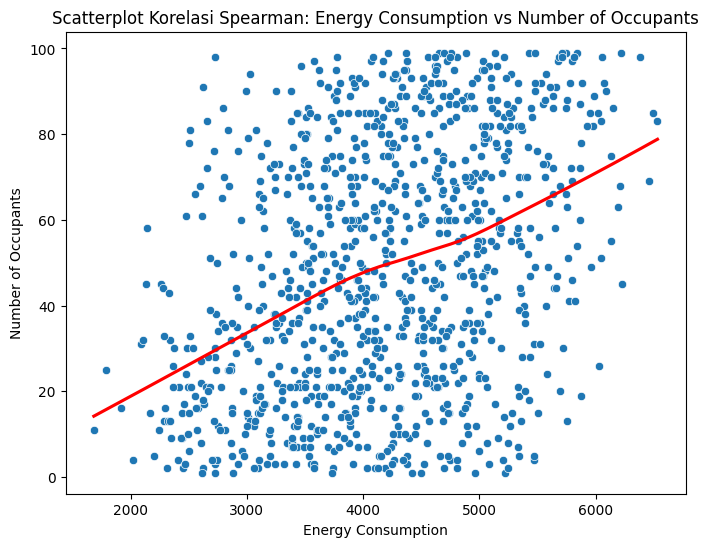

In [ ]:
# Scatterplot Korelasi Spearman [ Number of Occupants ]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Energy Consumption'], y=df['Number of Occupants'])

sns.regplot(x=df['Energy Consumption'], y=df['Number of Occupants'], scatter=False, lowess=True, color='red')

plt.title("Scatterplot Korelasi Spearman: Energy Consumption vs Number of Occupants")
plt.xlabel("Energy Consumption")
plt.ylabel("Number of Occupants")

plt.show()

## **Analisis Scatterplot Korelasi Spearman: Energy Consumption vs Number of Occupants**

> **Hubungan Positif Antara Variabel**
* Scatterplot menunjukkan terdapat korelasi positif antara Energy Consumption (Konsumsi Energi) dan Number of Occupants (Jumlah Penghuni).
* Terlihat dari garis regresi merah yang memiliki tren menaik. Artinya, semakin banyak penghuni, semakin besar konsumsi energi.

> **Hubungan Non-Linear**
* Garis merah diplot menggunakan metode Lowess menunjukkan pola non-linear, yang berarti hubungan antara kedua variabel ini tidak selalu linier.
* Di beberapa rentang, kenaikan jumlah penghuni tidak selalu berbanding lurus dengan kenaikan konsumsi energi.

> **Sebaran Data yang Cukup Variatif**
* Titik-titik data tersebar cukup luas, terutama di bagian atas, mengindikasikan meskipun ada korelasi positif, variabel lain mungkin juga memengaruhi konsumsi energi.
* Misalnya, dua rumah tangga dengan jumlah penghuni yang sama bisa memiliki konsumsi energi yang berbeda tergantung pada pola penggunaan energi mereka.

> **Potensi Hubungan Spearman yang Moderat**
* Karena pola hubungan terlihat monoton tetapi tidak sepenuhnya linier, analisis Korelasi Spearman mungkin lebih cocok daripada Korelasi Pearson.
* Ini sesuai dengan judul plot yang menyebutkan "Scatterplot Korelasi Spearman".

> **Kesimpulan:**
* Secara umum, lebih banyak penghuni cenderung meningkatkan konsumsi energi.
* Namun, hubungan ini tidak selalu linier dan bisa dipengaruhi oleh faktor lain seperti gaya hidup, efisiensi energi, atau jenis peralatan yang digunakan.

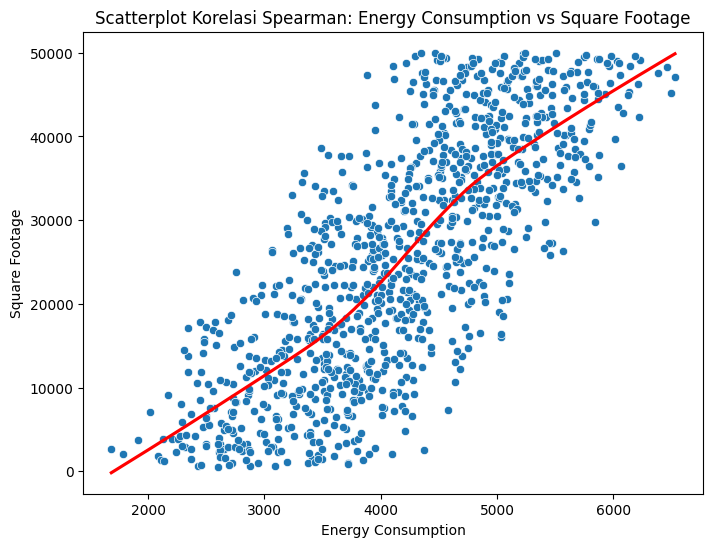

In [ ]:
# Scatterplot Korelasi Spearman [ Square Footage ]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Energy Consumption'], y=df['Square Footage'])

sns.regplot(x=df['Energy Consumption'], y=df['Square Footage'], scatter=False, lowess=True, color='red')

plt.title("Scatterplot Korelasi Spearman: Energy Consumption vs Square Footage")
plt.xlabel("Energy Consumption")
plt.ylabel("Square Footage")

plt.show()

## **Analisis Scatterplot Korelasi Spearman: Energy Consumption vs Square Footage**

> **Hubungan Positif yang Kuat**
* Plot menunjukkan korelasi positif yang cukup jelas antara Energy Consumption (Konsumsi Energi) dan Square Footage (Luas Bangunan).
* Semakin besar luas bangunan, semakin tinggi konsumsi energi. Karena bangunan yang lebih besar membutuhkan lebih banyak energi untuk pencahayaan, pemanas, pendingin ruangan, dan peralatan listrik lainnya.

> **Hubungan Non-Linear tetapi Monoton**
* Garis merah (Lowess regression line) mengikuti pola pertumbuhan non-linear.
* Pada luas bangunan kecil, konsumsi energi meningkat dengan kecepatan yang lebih rendah. Namun, setelah melewati titik tertentu (~3000–4000 sqft), peningkatan konsumsi energi menjadi lebih tajam.
* Menunjukkan bahwa bangunan yang lebih besar memiliki lebih banyak peralatan listrik atau sistem HVAC (pemanasan, ventilasi, dan pendingin udara) yang berkontribusi signifikan terhadap konsumsi energi.

> **Variabilitas Konsumsi Energi pada Luas Bangunan yang Sama**
* Meskipun ada tren positif, terdapat luas bangunan tertentu (misalnya sekitar 5000 sqft), terdapat perbedaan konsumsi energi yang cukup besar antar rumah.
* Hal ini disebabkan oleh faktor lain seperti efisiensi energi bangunan, jumlah penghuni, atau kebiasaan penggunaan energi.

> **Spearman Correlation yang Kuat**
* Karena hubungan terlihat monoton meskipun tidak sepenuhnya linier, Korelasi Spearman adalah metrik yang tepat untuk mengukur hubungan ini.
* Korelasi Spearman akan memberikan nilai yang tinggi, menunjukkan bahwa Energy Consumption cenderung meningkat seiring bertambahnya Square Footage.

> **Kesimpulan**
* Bangunan lebih besar cenderung mengonsumsi lebih banyak energi.
* Pola kenaikannya non-linear, mungkin karena semakin besar bangunan, semakin banyak perangkat listrik yang digunakan.
* Faktor lain masih berperan, seperti efisiensi energi bangunan atau kebiasaan penghuni.

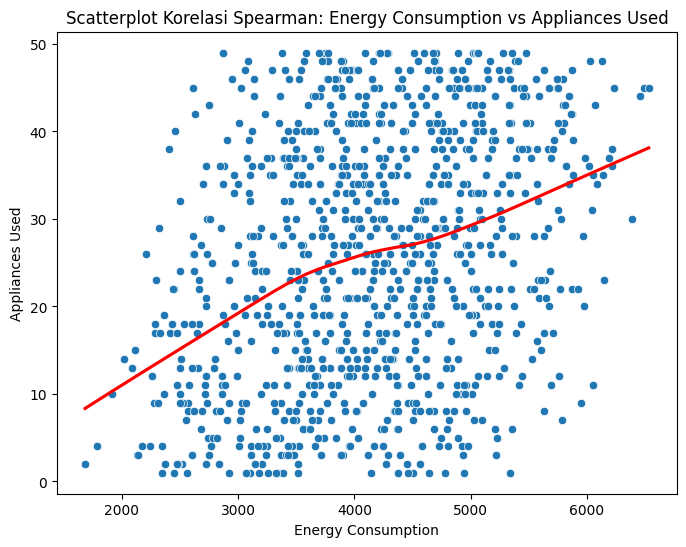

In [ ]:
# Scatterplot Korelasi Spearman [ Appliances Used ]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Energy Consumption'], y=df['Appliances Used'])

sns.regplot(x=df['Energy Consumption'], y=df['Appliances Used'], scatter=False, lowess=True, color='red')

plt.title("Scatterplot Korelasi Spearman: Energy Consumption vs Appliances Used")
plt.xlabel("Energy Consumption")
plt.ylabel("Appliances Used")

plt.show()

## **Analisis Scatterplot Korelasi Spearman: Energy Consumption vs Appliances Used**

> **Hubungan Positif Antara Energy Consumption dan Appliances Used**
* Scatterplot menunjukkan tren positif, di mana semakin besar Energy Consumption, semakin besar Appliances Used.
* Hal ini menunjukkan bahwa semakin besar Energy Consumption, cenderung memiliki Appliances Used yang lebih besar.

> **Hubungan Non-Linear Tetapi Monoton**
* Garis merah (Lowess regression line) memperlihatkan pola yang tidak sepenuhnya linier, tetapi tetap menunjukkan peningkatan yang cukup konsisten.
* Pada rentang Energy Consumption kecil (~2000–3500), Appliances Used bertambah dengan cukup cepat. Setelah itu, pertumbuhan Appliances Used terhadap Energy Consumption menjadi lebih landai.

> **Sebaran Data yang Variatif**
* Meskipun ada tren positif, sebaran titik-titik cukup luas, menunjukkan bahwa untuk Energy Consumption yang sama, Appliances Used bisa sangat bervariasi.
* Ini bisa disebabkan oleh faktor lain seperti perbedaan energi barang, jumlah barang, atau seberapa lama barang tersebut tetap menyala.

> **Spearman Correlation yang Moderat hingga Kuat**
* Karena korelasinya monoton tetapi tidak linier, Korelasi Spearman cocok untuk mengukur hubungan ini.
* Korelasinya mungkin moderat hingga kuat (misalnya antara 0.5–0.8), tergantung pada kekonsistenan pola di seluruh rentang data.

> **Kesimpulan**
* Energy Consumption dan Appliances Used memiliki hubungan positif—objek yang lebih panjang cenderung memiliki Appliances Used yang lebih besar.
* Hubungan ini tidak sepenuhnya linier, tetapi menunjukkan pola monoton yang bisa ditangkap oleh Korelasi Spearman.
* Ada variabilitas signifikan, menunjukkan faktor lain mungkin memengaruhi Appliances Used selain panjang.

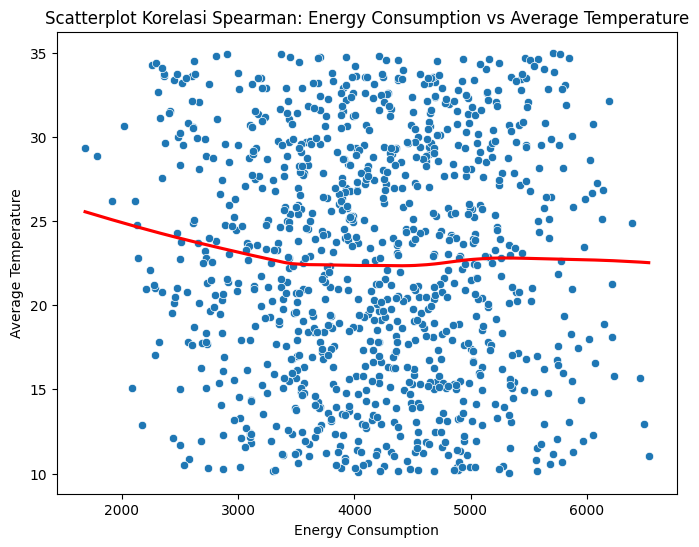

In [ ]:
# Scatterplot Korelasi Spearman [ Average Temperature ]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Energy Consumption'], y=df['Average Temperature'])

sns.regplot(x=df['Energy Consumption'], y=df['Average Temperature'], scatter=False, lowess=True, color='red')

plt.title("Scatterplot Korelasi Spearman: Energy Consumption vs Average Temperature")
plt.xlabel("Energy Consumption")
plt.ylabel("Average Temperature")

plt.show()

## **Analisis Scatterplot Korelasi Spearman: Energy Consumption vs Average Temperature**

> **Tidak Ada Hubungan yang Jelas**
* Tidak terlihat pola hubungan yang jelas antara Energy Consumption dan Average Temperature.
* Titik-titik data tersebar secara acak tanpa tren yang kuat ke arah positif atau negatif.

> **Garis Lowess Mendatar**
* Garis merah (Lowess regression line) hampir datar, menunjukkan tidak ada korelasi kuat antara Energy Consumption dan Average Temperature.
* Berarti, perubahan Energy Consumption tidak terlalu mempengaruhi Average Temperature, atau ada variabel lain yang lebih berpengaruh.

> **Variabilitas yang Tinggi**
* Untuk setiap nilai Energy Consumption, Average Temperature memiliki rentang nilai yang luas.
* Menunjukkan bahwa Average Temperature mungkin ditentukan oleh faktor lain selain Energy Consumption.

> **Korelasi Spearman Rendah**
* Karena tidak ada hubungan monoton yang jelas, koefisien korelasi Spearman kemungkinan sangat rendah (mendekati nol).
* Artinya, perubahan pada Average Temperature tidak bisa digunakan untuk memprediksi Energy Consumption.

> **Kesimpulan**
* Tidak ada korelasi yang signifikan antara Energy Consumption dan Average Temperature.
* Penyebaran data sangat acak, tanpa pola monoton yang jelas.
* Faktor lain mungkin lebih berpengaruh dalam menentukan Average Temperature.

## **Pairplot (Seaborn) → Melihat Hubungan Seluruh Variabel**

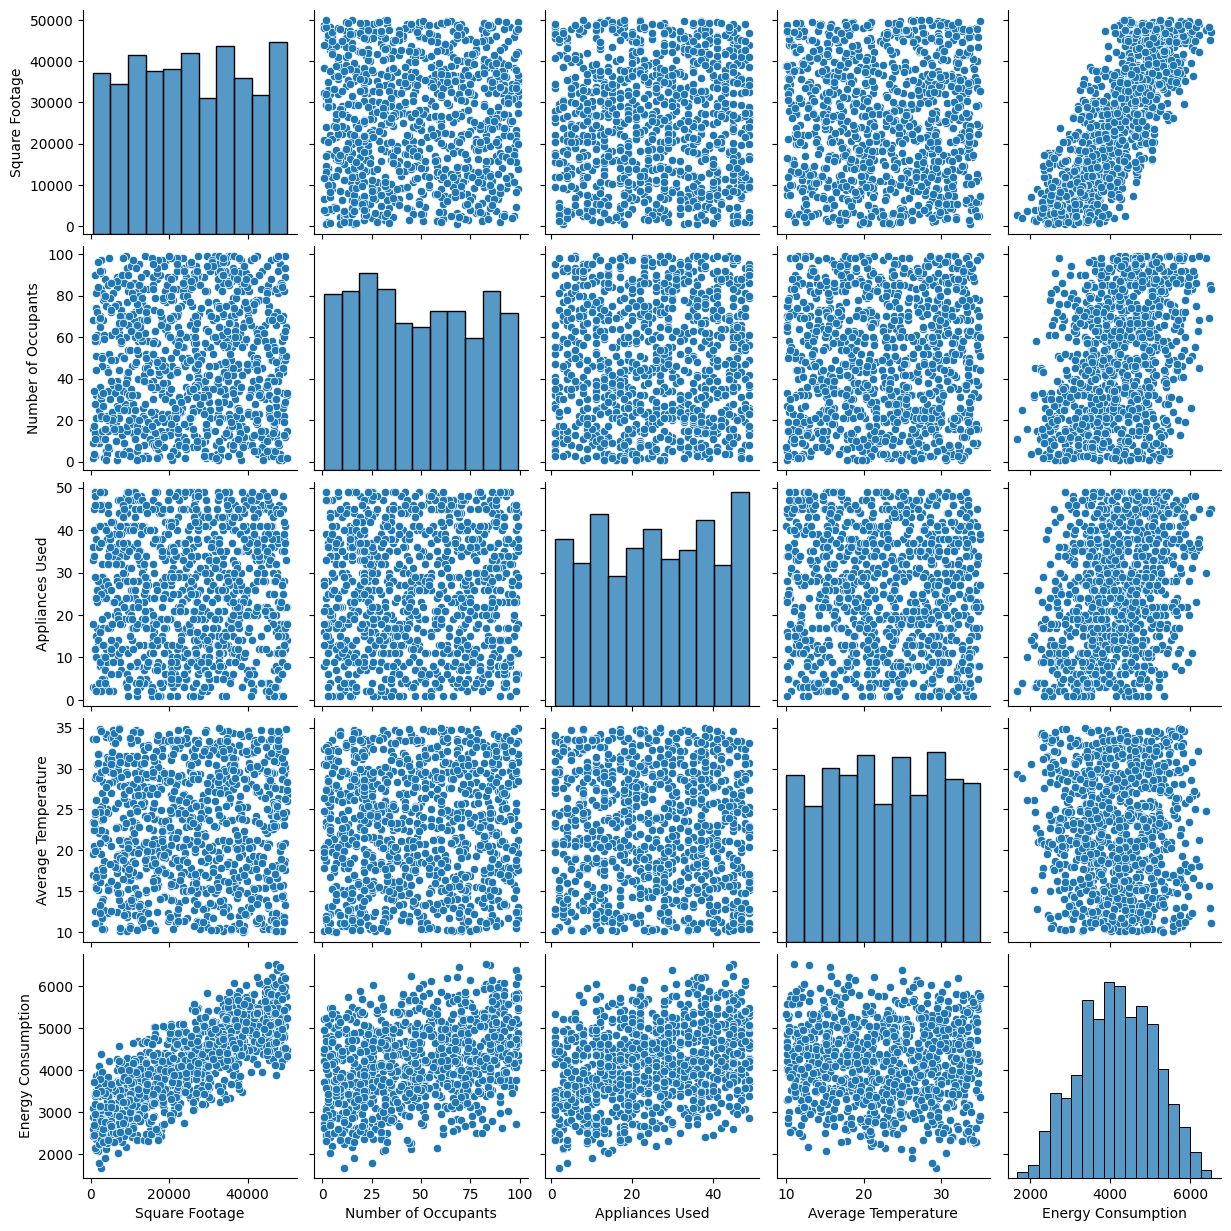

In [ ]:
sns.pairplot(df)
plt.show()

### **Interpretasi Output Pairplot:**
> Pairplot ini menunjukkan hubungan antar variabel dalam dataset melalui scatter plot dan histogram untuk distribusi setiap variabel. Beberapa interpretasi yang bisa diambil dari plot ini:

> **Hubungan antara Square Footage dan Energy Consumption**
* Tampak ada korelasi positif yang cukup kuat antara ukuran rumah (Square Footage) dan konsumsi energi (Energy Consumption). Artinya, semakin besar ukuran rumah, semakin tinggi konsumsi energinya.

> **Distribusi variabel individu**
* Histogram di diagonal menunjukkan distribusi dari masing-masing variabel.
* Variabel seperti Energy Consumption tampaknya memiliki distribusi mendekati normal.
* Variabel Number of Occupants, Appliances Used, dan Average Temperature memiliki distribusi yang cukup merata.

> **Hubungan antara variabel lainnya**
* Tidak terlihat korelasi yang jelas antara jumlah penghuni (Number of Occupants), jumlah perangkat elektronik yang digunakan (Appliances Used), dan suhu rata-rata (Average Temperature) dengan konsumsi energi.
* Scatter plot antara Appliances Used dan Energy Consumption menunjukkan pola acak, mengindikasikan bahwa jumlah perangkat elektronik yang digunakan mungkin tidak memiliki hubungan linier yang kuat dengan konsumsi energi.
* Tidak ada pola yang jelas antara Average Temperature dan Energy Consumption, yang menunjukkan bahwa suhu rata-rata mungkin tidak terlalu mempengaruhi konsumsi energi dalam dataset ini.

> **Kesimpulannya,** dari pairplot ini, Square Footage adalah faktor yang paling berpengaruh terhadap Energy Consumption, sementara variabel lain tidak menunjukkan hubungan yang kuat secara visual. Analisis statistik lebih lanjut seperti korelasi Pearson dapat membantu menguatkan hasil ini.

# **KESIMPULAN SELURUH UJI HIPOTESIS**

**Dari semua uji hipotesis ini, dapat disimpulkan bahwa:**

> **Faktor utama yang berpengaruh signifikan terhadap konsumsi energi adalah luas bangunan dan jumlah penghuni.** Semakin besar luas bangunan dan semakin banyak penghuni, semakin tinggi konsumsi energi.

> **Jumlah peralatan yang digunakan** menunjukkan hasil yang bervariasi. Dalam satu uji, tidak ditemukan pengaruh signifikan, tetapi dalam uji lainnya, ada pengaruh signifikan. Ini menunjukkan bahwa dampaknya bisa tergantung pada faktor lain atau metode analisis yang digunakan.

> **Suhu rata-rata (Average Temperature)** tidak memiliki hubungan signifikan dengan konsumsi energi. Artinya, dalam dataset ini, perubahan suhu tidak terlalu memengaruhi penggunaan energi.

> **Hubungan antara konsumsi energi dan variabel lain:**
* **Luas bangunan** memiliki hubungan paling kuat dengan konsumsi energi (korelasi Spearman = 0.7816, p = 0.0000).
* **Jumlah penghuni** memiliki hubungan sedang dengan konsumsi energi (korelasi Spearman = 0.3428, p = 0.0000).
* **Jumlah peralatan** yang digunakan memiliki hubungan lemah hingga sedang (korelasi Spearman = 0.2977, p = 0.0000).
* **Suhu rata-rata** tidak berhubungan dengan konsumsi energi (korelasi Spearman = -0.0223, p = 0.4810).

> **Kesimpulan Akhir:**
* Luas bangunan merupakan faktor paling dominan dalam menentukan konsumsi energi, diikuti oleh jumlah penghuni dan jumlah peralatan yang digunakan.
* Sementara itu, suhu rata-rata tidak memengaruhi konsumsi energi dalam dataset ini.